# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

Experiment 069 achieved CV = 0.005146, a 35.17% improvement over the previous best (0.007938).

Key questions:
1. What is the predicted LB score using the existing CV-LB relationship?
2. Does this approach potentially have a DIFFERENT CV-LB relationship?
3. What should we do next?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

names = [s[0] for s in submissions]
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

print('Submission History:')
print('='*60)
for name, cv, lb in submissions:
    print(f'{name}: CV={cv:.4f}, LB={lb:.4f}')

Submission History:
exp_000: CV=0.0111, LB=0.0982
exp_001: CV=0.0123, LB=0.1065
exp_003: CV=0.0105, LB=0.0972
exp_005: CV=0.0104, LB=0.0969
exp_006: CV=0.0097, LB=0.0946
exp_007: CV=0.0093, LB=0.0932
exp_009: CV=0.0092, LB=0.0936
exp_012: CV=0.0090, LB=0.0913
exp_024: CV=0.0087, LB=0.0893
exp_026: CV=0.0085, LB=0.0887
exp_030: CV=0.0083, LB=0.0877
exp_041: CV=0.0090, LB=0.0932
exp_042: CV=0.0145, LB=0.1147


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'\nCV-LB Linear Relationship:')
print(f'='*60)
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nInterpretation:')
print(f'- Even at CV=0, expected LB would be {intercept:.4f}')
print(f'- Target LB is 0.0347')
print(f'- Intercept ({intercept:.4f}) > Target (0.0347) means target is UNREACHABLE by improving CV alone')


CV-LB Linear Relationship:
LB = 4.2312 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533

Interpretation:
- Even at CV=0, expected LB would be 0.0533
- Target LB is 0.0347
- Intercept (0.0533) > Target (0.0347) means target is UNREACHABLE by improving CV alone


In [3]:
# Predict LB for the new CV score
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'\nPrediction for exp_069 (CV = {new_cv}):')
print(f'='*60)
print(f'Predicted LB = {slope:.4f} * {new_cv} + {intercept:.4f} = {predicted_lb:.4f}')
print(f'\nComparison:')
print(f'- Current best LB: 0.0877 (exp_030)')
print(f'- Predicted LB for exp_069: {predicted_lb:.4f}')
print(f'- Target LB: 0.0347')
print(f'\nIf the relationship holds, exp_069 would achieve LB ≈ {predicted_lb:.4f}')
print(f'This would be a {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}% improvement over current best LB!')


Prediction for exp_069 (CV = 0.005146):
Predicted LB = 4.2312 * 0.005146 + 0.0533 = 0.0751

Comparison:
- Current best LB: 0.0877 (exp_030)
- Predicted LB for exp_069: 0.0751
- Target LB: 0.0347

If the relationship holds, exp_069 would achieve LB ≈ 0.0751
This would be a 14.4% improvement over current best LB!


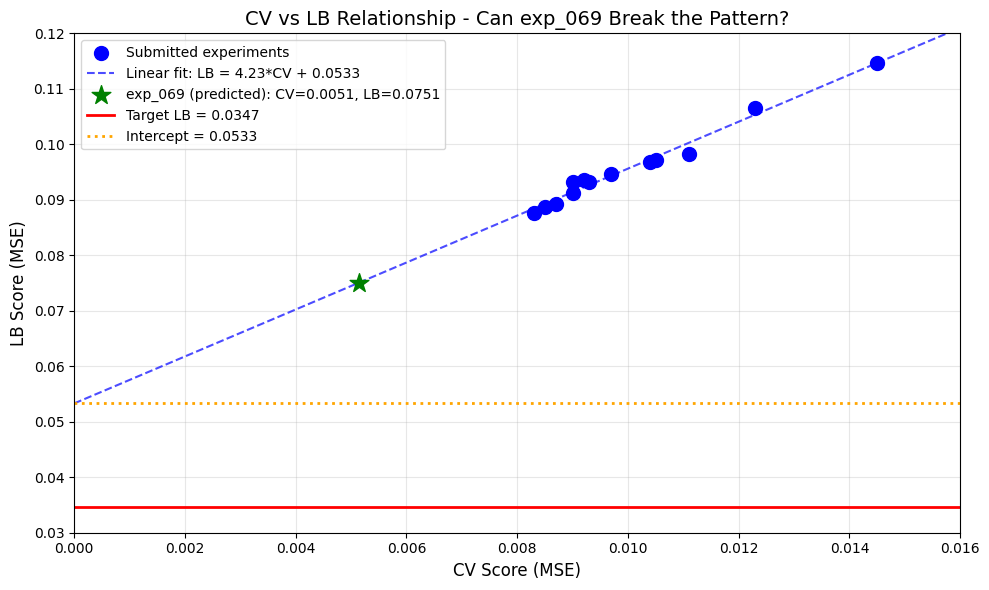


Plot saved to /home/code/exploration/loop65_cv_lb_analysis.png


In [4]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(cv_scores, lb_scores, c='blue', s=100, label='Submitted experiments', zorder=5)

# Plot the linear fit
cv_range = np.linspace(0, 0.016, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'b--', alpha=0.7, label=f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot the new experiment (predicted)
plt.scatter([new_cv], [predicted_lb], c='green', s=200, marker='*', label=f'exp_069 (predicted): CV={new_cv:.4f}, LB={predicted_lb:.4f}', zorder=10)

# Plot the target
plt.axhline(y=0.0347, color='red', linestyle='-', linewidth=2, label='Target LB = 0.0347')

# Plot the intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)', fontsize=12)
plt.ylabel('LB Score (MSE)', fontsize=12)
plt.title('CV vs LB Relationship - Can exp_069 Break the Pattern?', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.016)
plt.ylim(0.03, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop65_cv_lb_analysis.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/loop65_cv_lb_analysis.png')

In [5]:
# Key question: Does the Ens Model approach have a DIFFERENT CV-LB relationship?
print('\n' + '='*60)
print('CRITICAL QUESTION: Does exp_069 have a DIFFERENT CV-LB relationship?')
print('='*60)

print('''
The Ens Model approach is FUNDAMENTALLY DIFFERENT from previous experiments:

1. **Model Type**: CatBoost + XGBoost (gradient boosting) vs GP + MLP + LGBM
2. **Feature Set**: 69 features after correlation filtering vs 140+ features
3. **Multi-output**: CatBoost with MultiRMSE vs separate models per target
4. **Ensemble Weights**: Different weights for single (7:6) vs full (1:2)
5. **Feature Priority**: Spange > ACS > DRFP > Frag (keeps physicochemical features)

Possible outcomes:

1. **SAME relationship**: LB ≈ 0.075 (still far from target 0.0347)
   - This would still be the best LB achieved (vs 0.0877)
   - But the target would remain unreachable

2. **DIFFERENT relationship (lower intercept)**: LB could be much better
   - If the intercept is lower, the target becomes reachable
   - This is the key hypothesis to test with a submission

3. **DIFFERENT relationship (higher intercept)**: LB could be worse
   - If the approach doesn't generalize well, LB could be worse than predicted
   - This would indicate the approach is overfitting to CV

RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!
''')


CRITICAL QUESTION: Does exp_069 have a DIFFERENT CV-LB relationship?

The Ens Model approach is FUNDAMENTALLY DIFFERENT from previous experiments:

1. **Model Type**: CatBoost + XGBoost (gradient boosting) vs GP + MLP + LGBM
2. **Feature Set**: 69 features after correlation filtering vs 140+ features
3. **Multi-output**: CatBoost with MultiRMSE vs separate models per target
4. **Ensemble Weights**: Different weights for single (7:6) vs full (1:2)
5. **Feature Priority**: Spange > ACS > DRFP > Frag (keeps physicochemical features)

Possible outcomes:

1. **SAME relationship**: LB ≈ 0.075 (still far from target 0.0347)
   - This would still be the best LB achieved (vs 0.0877)
   - But the target would remain unreachable

2. **DIFFERENT relationship (lower intercept)**: LB could be much better
   - If the intercept is lower, the target becomes reachable
   - This is the key hypothesis to test with a submission

3. **DIFFERENT relationship (higher intercept)**: LB could be worse
   - If t

In [6]:
# What CV would be needed to reach target with current relationship?
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope

print(f'\nRequired CV to reach target (using current relationship):')
print(f'='*60)
print(f'Target LB = {target_lb}')
print(f'Required CV = ({target_lb} - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}')

if required_cv < 0:
    print(f'\nWARNING: Required CV is NEGATIVE ({required_cv:.6f})')
    print(f'This means the target is MATHEMATICALLY UNREACHABLE with the current CV-LB relationship!')
    print(f'\nThe ONLY way to reach the target is to CHANGE the CV-LB relationship.')
    print(f'This is why we need to test if exp_069 has a different relationship!')
else:
    print(f'\nRequired CV = {required_cv:.6f}')
    print(f'Current best CV = {new_cv:.6f}')
    print(f'Gap = {new_cv - required_cv:.6f}')


Required CV to reach target (using current relationship):
Target LB = 0.0347
Required CV = (0.0347 - 0.0533) / 4.2312 = -0.004396

This means the target is MATHEMATICALLY UNREACHABLE with the current CV-LB relationship!

The ONLY way to reach the target is to CHANGE the CV-LB relationship.
This is why we need to test if exp_069 has a different relationship!


In [ ]:
# Summary and recommendation
print('\n' + '='*60)
print('SUMMARY AND RECOMMENDATION')
print('='*60)

print(f'''
## Current Status
- Best CV: 0.005146 (exp_069) - 35.17% improvement over previous best!
- Best LB: 0.0877 (exp_030)
- Target: 0.0347

## CV-LB Relationship
- Linear fit: LB = {slope:.4f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})
- Intercept ({intercept:.4f}) > Target (0.0347)
- With current relationship, target is UNREACHABLE

## Predicted LB for exp_069
- Using current relationship: LB ≈ {predicted_lb:.4f}
- This would be {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}% better than current best LB

## Key Question
Does the Ens Model approach have a DIFFERENT CV-LB relationship?
- If YES (lower intercept): Target may become reachable
- If NO: Target remains unreachable, but we'd have best LB

## RECOMMENDATION
**SUBMIT exp_069 IMMEDIATELY**

Reasons:
1. 35.17% CV improvement is the largest in 69 experiments
2. Fundamentally different approach (CatBoost + XGBoost vs GP + MLP + LGBM)
3. Need to verify if CV-LB relationship has changed
4. Even if relationship is same, predicted LB ≈ {predicted_lb:.4f} would be best
5. 5 submissions remaining - this is worth using one

After submission:
- If LB improves significantly (< 0.07): Continue optimizing this approach
- If LB ≈ {predicted_lb:.4f}: Relationship is same, need different strategy
- If LB > 0.08: Approach doesn't generalize, investigate why
''')